In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
# N * D so it has 30 features
x,y = data.data,data.target

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
N,D = x_train.shape

In [10]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [11]:
# inputs N*D so for every feature there is an input
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [14]:
n_epochs = 1000

train_loss = np.zeros(n_epochs)
test_loss = np.zeros(n_epochs)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs,y_train)
    train_loss[epoch] = loss.item()
    loss.backward()
    optimizer.step()
    test_output= model(x_test)
    testloss = criterion(test_output,y_test)
    test_loss[epoch] = testloss.item()
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():.4f}')


Epoch 1/1000, Train Loss: 0.8337, Test Loss: 0.8337
Epoch 2/1000, Train Loss: 0.8255, Test Loss: 0.8255
Epoch 3/1000, Train Loss: 0.8174, Test Loss: 0.8174
Epoch 4/1000, Train Loss: 0.8093, Test Loss: 0.8093
Epoch 5/1000, Train Loss: 0.8014, Test Loss: 0.8014
Epoch 6/1000, Train Loss: 0.7935, Test Loss: 0.7935
Epoch 7/1000, Train Loss: 0.7858, Test Loss: 0.7858
Epoch 8/1000, Train Loss: 0.7781, Test Loss: 0.7781
Epoch 9/1000, Train Loss: 0.7705, Test Loss: 0.7705
Epoch 10/1000, Train Loss: 0.7630, Test Loss: 0.7630
Epoch 11/1000, Train Loss: 0.7556, Test Loss: 0.7556
Epoch 12/1000, Train Loss: 0.7483, Test Loss: 0.7483
Epoch 13/1000, Train Loss: 0.7410, Test Loss: 0.7410
Epoch 14/1000, Train Loss: 0.7339, Test Loss: 0.7339
Epoch 15/1000, Train Loss: 0.7268, Test Loss: 0.7268
Epoch 16/1000, Train Loss: 0.7199, Test Loss: 0.7199
Epoch 17/1000, Train Loss: 0.7130, Test Loss: 0.7130
Epoch 18/1000, Train Loss: 0.7063, Test Loss: 0.7063
Epoch 19/1000, Train Loss: 0.6996, Test Loss: 0.6996
Ep

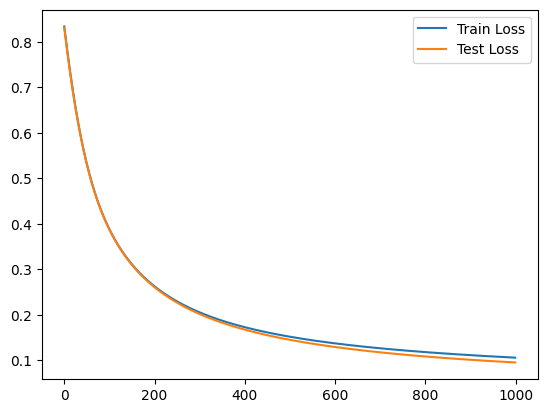

In [15]:
plt.plot(train_loss,label = 'Train Loss')
plt.plot(test_loss,label = 'Test Loss')
plt.legend()
plt.show()

In [16]:
with torch.no_grad():
    y_predicted_train = model(x_train)
    y_predicted_train = np.round(y_predicted_train.numpy())
    train_acc = np.mean(y_predicted_train == y_train.numpy())
    # Were the train and predicted train are equal, the array will be 1 else 0. This is the correctly predicted and the wronglt predicted
    # getting the mean of the array is like adding all the correct of the total samples so it is like the acccuracy

    y_predicted_test = model(x_test)
    y_predicted_test = np.round(y_predicted_test.numpy())
    test_acc = np.mean(y_predicted_test == y_test.numpy())

print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9790, Test Accuracy: 0.9894


In [17]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1984, -0.2482, -0.2533, -0.3101, -0.1756, -0.3645, -0.2319, -0.2710,
                       -0.1305,  0.6009, -0.4129,  0.0083, -0.2412, -0.4490, -0.0373, -0.0265,
                       -0.0354, -0.1986,  0.2348,  0.3834, -0.5067, -0.5296, -0.5003, -0.3752,
                       -0.4814, -0.1054, -0.2163, -0.2367, -0.4068, -0.2543]])),
             ('0.bias', tensor([0.3629]))])

In [18]:
torch.save(model.state_dict(),'breast_cancer_model.pt')

In [19]:
!ls

breast_cancer_model.pt	sample_data


In [20]:
loading_model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
loading_model.load_state_dict(torch.load('breast_cancer_model.pt'))

<ipython-input-20-ece8a493b328>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loading_model.load_state_dict(torch.load('breast_cancer_model.pt'))


<All keys matched successfully>

In [21]:
with torch.no_grad():
    y_predicted_train = loading_model(x_train)
    y_predicted_train = np.round(y_predicted_train.numpy()) # sigmoid > 0.5 predicts 1 and < 0.5 predicts 0
    train_acc = np.mean(y_predicted_train == y_train.numpy())
    # Were the train and predicted train are equal, the array will be 1 else 0. This is the correctly predicted and the wronglt predicted
    # getting the mean of the array is like adding all the correct of the total samples so it is like the acccuracy

    y_predicted_test = loading_model(x_test)
    y_predicted_test = np.round(y_predicted_test.numpy())
    test_acc = np.mean(y_predicted_test == y_test.numpy())

print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')
# will be same accuracy so same model (this cell is to validate same model)

Train Accuracy: 0.9790, Test Accuracy: 0.9894


In [23]:
from google.colab import files
files.download('breast_cancer_model.pt')
# or download from files tab top left corner

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>